In [37]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pickle


def plotxyz(t, list_array_xyz, list_label, ylim=None):
    for i in range(3):
        plt.figure(figsize=(10, 3))
        for j in range(len(list_array_xyz)):
            plt.plot(t, list_array_xyz[j][:, i], label=f'{list_label[j]}_{"xyz"[i]}')
            # plt.scatter(t, list_array_xyz[j][:, i], label=f'{list_label[j]}_{"xyz"[i]}')
        plt.legend()
        if ylim is not None:
            plt.ylim(ylim)
        plt.show()

In [45]:
dataset_path = 'omega_2023-11-15_13-43-18_log02.pkl'
dataset = pickle.load(open(dataset_path, 'rb'))
# dict_keys(['field', 'data', 'unit'])
print(dataset.keys())
print("field: ", dataset['field'], "\nunit: ", dataset['unit'])
data = dataset['data']
print("data.shape: ", data.shape)

# field:  ['t', 'p', 'omega', 'omega_tar'] data.shape:  (10, 2225)
t = data[0, :]
p = data[1:4, :]
omega = data[4:7, :]
omega_tar = data[7:10, :]

dict_keys(['field', 'data', 'unit'])
field:  ['t', 'p', 'omega', 'omega_tar'] 
unit:  Si
data.shape:  (10, 2225)
t.shape:  (2225,)
p.shape:  (3, 2225)
omega.shape:  (3, 2225)
omega_tar.shape:  (3, 2225)


d_omega.shape:  (2224,)
err.shape:  (2224,)
tau:  0.1974865768638099
d_omega.shape:  (2224,)
err.shape:  (2224,)
tau:  0.1974865768638099
d_omega.shape:  (2224,)
err.shape:  (2224,)
tau:  0.1974865768638099
tau_x:  0.1974865768638099


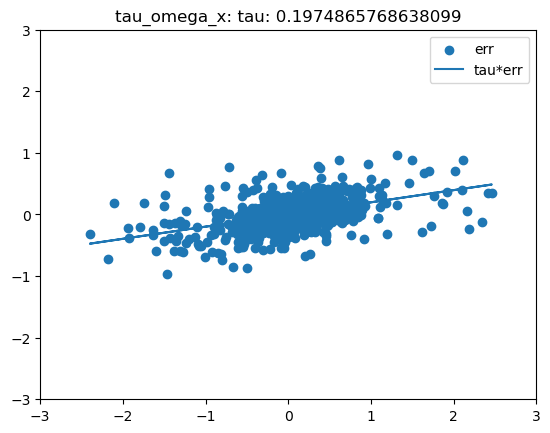

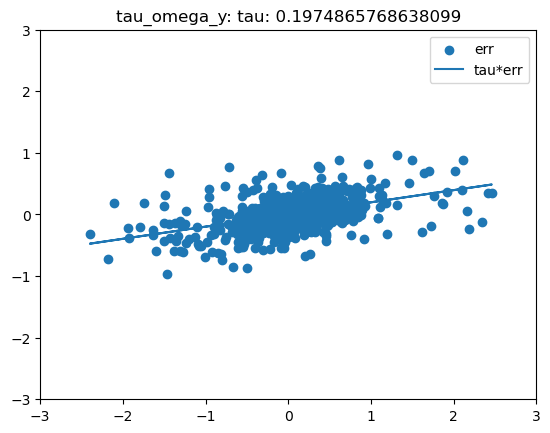

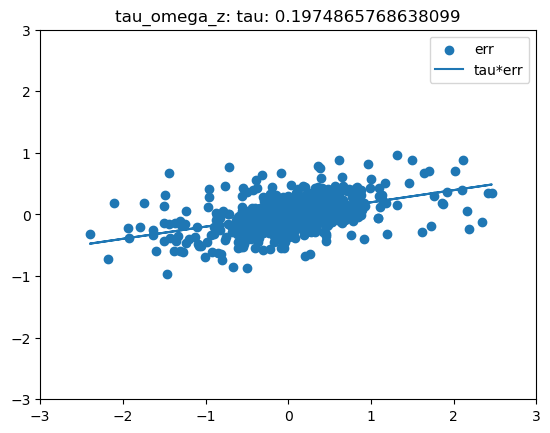

In [52]:
def regress_tau(omega, omega_tar, show=None):
    '''regress time constant tau for each axis using least square method, threat omega as a first order dynamics system'''
    err = omega_tar - omega
    err = err[: -1]
    d_omega = np.diff(omega)

    tau = np.linalg.lstsq(err.reshape(-1, 1), d_omega.reshape(-1, 1), rcond=None)[0][0][0]
    
    if show is not None:

        print("d_omega.shape: ", d_omega.shape)
        print("err.shape: ", err.shape)

        print("tau: ", tau)
        plt.figure()
        plt.scatter(err, d_omega, label='err')
        plt.ylim([-3.0, 3.0])
        plt.xlim([-3.0, 3.0])
        plt.plot(err, tau*err, label='tau*err')
        plt.legend()
        plt.title(f'{show}: tau: {tau}')

    return tau

tau_x = regress_tau(omega[0], omega_tar[0], "tau_omega_x")
tau_y = regress_tau(omega[0], omega_tar[0], "tau_omega_y")
tau_z = regress_tau(omega[0], omega_tar[0], "tau_omega_z")
print("tau_x: ", tau_x)



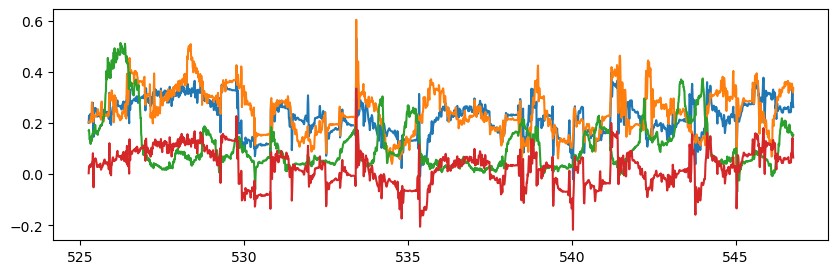

In [50]:
'''sliding window on t to calculate tau, plot tau'''

t_window = 0.5 # second
t_window = int(t_window / (t[1] - t[0]))

tau_x_list = []
tau_y_list = []
tau_z_list = []
tau_t_list = []
tau_p_list = []


for i in range(len(t)):
    if i + t_window > len(t):
        break
    tau_x = regress_tau(omega[0, i: i + t_window], omega_tar[0, i: i + t_window])
    tau_y = regress_tau(omega[1, i: i + t_window], omega_tar[1, i: i + t_window])
    tau_z = regress_tau(omega[2, i: i + t_window], omega_tar[2, i: i + t_window])

    tau_p = p[:, i + t_window//2]
    tau_t = t[i + t_window//2]
    tau_x_list.append(tau_x)
    tau_y_list.append(tau_y)
    tau_z_list.append(tau_z)
    tau_p_list.append(tau_p)
    tau_t_list.append(tau_t)

tau_t_list = np.array(tau_t_list)
tau_x_list = np.array(tau_x_list)
tau_y_list = np.array(tau_y_list)
tau_z_list = np.array(tau_z_list)
tau_p_list = np.array(tau_p_list)

plt.figure(figsize=(10, 3))
plt.plot(tau_t_list, tau_x_list, label='tau_x')
plt.plot(tau_t_list, tau_y_list, label='tau_y')
plt.plot(tau_t_list, tau_z_list, label='tau_z')

err_tau_x = tau_x_list - regress_tau(omega[0], omega_tar[0])
err_tau_y = tau_y_list - regress_tau(omega[1], omega_tar[1])
err_tau_z = tau_z_list - regress_tau(omega[2], omega_tar[2])



